<a href="https://colab.research.google.com/github/Manuelstv/astro-ml/blob/main/1alt_rotsub%2Borig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Colab LensDetectNet**

---

**Convolutional Neural Network to Detect Lens in Image .fits**

---





In [ ]:
#install libraries
#%matplotlib inline
!apt-get -y install -qq graphviz
!pip install -U -q astropy
!pip install -U -q pydot
!pip install -U -q pydot_ng
!pip install -U -q graphviz

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pylab as py
import cv2
import h5py

import scipy
import scipy.misc
import warnings
import os
import keras
import pydot
import pydot_ng
import time
import tensorflow as tf
import timeit
import matplotlib.pyplot as plt


from google.colab import drive
from google.colab import files
from astropy.io import fits
from keras import models
from keras.models import Sequential
from keras import layers
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.utils import plot_model
from IPython.display import Image, display
from keras import backend as K
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler

from keras.applications.resnet50 import ResNet50

warnings.filterwarnings("ignore")





Using TensorFlow backend.


In [ ]:
from google.colab import drive

# **Mount drive for save outputs**
**Let drive mount on your google drive and copy the code, go to colab and paste the code there**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/NewData/SpaceBasedTraining/Data/agrupp"

/content/drive/My Drive/NewData/SpaceBasedTraining/Data/agrupp


# Load data labels y_data

In [ ]:
#!ls
PATH = os.getcwd()
y_path = PATH+'/'
y_batch = os.listdir(y_path)
# Importing labels
labels = pd.read_csv('classifications2.csv',delimiter=',', header=-1)

y_data = np.array(labels, np.uint8)

#y_data = y_data[:,1]
#print(y_data[0,:])

# **Load x_data**


https://fits2hdf.readthedocs.io/en/latest/getting_started.html



https://python4astronomers.github.io/astropy/fits.html


In [ ]:
## load x_data
#import h5py

#original_data=np.zeros(100)
#id=0
#while (id<101):
#  a = 100000 + id
#  original_data[id]=fits.getdata('imageEUC_VIS-'+str(a)+'.fits', ignore_missing_end=True)
#id =id+1

#x_data=np.zeros((100,101,101,2))
x_data=np.zeros((20000,101,101,2))
print(x_data.shape)

for i in np.arange(0,20000,1):
  nmbimg=100000 + i
  image_orig_name =  'imageEUC_VIS-'+str(nmbimg)+'_rotsub.fits'
  image_orig_name2 =  'imageEUC_VIS-'+str(nmbimg)+'.fits'

  image_orig = fits.getdata(image_orig_name)#, ext=0)
  image_orig2 = fits.getdata(image_orig_name2)#, ext=0)
  
  scaler = MinMaxScaler(feature_range=(0, 100))
  image_orig = scaler.fit_transform(image_orig)
  image_orig2 = scaler.fit_transform(image_orig2)

  #image_orig= np.float32(image_dataR)
  #image_rotsub_name='imageEUC_VIS-'+str(nmbimg)+'_rotsub.fits'
  #image_rotsub = fits.getdata(image_rotsub_name)#, ext=0) %%
  x_data[i,:,:,0]=image_orig
  x_data[i,:,:,1] =image_orig2
  
  #x_data[i,:,:,1]=image_rotsub
  
  if (i%50 == 0):
    print (i)
  


#x_datasaved = h5py.File('x_data20000fits.h5', 'r')
#x_data = x_datasaved['data']
#print(x_data.shape)

#print(x_data[99,:,:,1])

# change shape
x_data = np.moveaxis(x_data, -1, 0) 
x_data = np.moveaxis(x_data, -3, 0)
print(x_data.shape)


(20000, 101, 101, 2)
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10

Filename: imageEUC_VIS-100002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   (101, 101)   float32   
(101, 101)


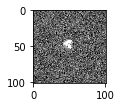

In [ ]:
import bisect

vout = (0,255)
def imadjust(src, tol=0.5, vin=[0,255], vout=vout):
    # src : input one-layer image (numpy array)
    # tol : tolerance, from 0 to 100.
    # vin  : src image bounds
    # vout : dst image bounds
    # return : output img

    dst = src.copy()
    tol = max(0, min(100, tol))

    if tol > 0:
        # Compute in and out limits
        # Histogram
        hist = np.zeros(256, dtype=np.int)
        for r in range(src.shape[0]):
            for c in range(src.shape[1]):
                hist[src[r,c]] += 1
        # Cumulative histogram
        cum = hist.copy()
        for i in range(1, len(hist)):
            cum[i] = cum[i - 1] + hist[i]

        # Compute bounds
        total = src.shape[0] * src.shape[1]
        low_bound = total * tol / 100
        upp_bound = total * (100 - tol) / 100
        vin[0] = bisect.bisect_left(cum, low_bound)
        vin[1] = bisect.bisect_left(cum, upp_bound)

    # Stretching
    if (vin[1] - vin[0]) > 0:
        scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
    else:
        scale = 0
        
    for r in range(dst.shape[0]):
        for c in range(dst.shape[1]):
            vs = max(src[r,c] - vin[0], 0)
            vd = min(int(vs * scale + 0.5) + vout[0], vout[1])
            dst[r,c] = vd
    return dst
  
nmbimg = '100002'  
  
idximg = 'imageEUC_VIS'
image_file = 'imageEUC_VIS-'+str(nmbimg)+'.fits'
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)
image_data= np.float32(image_data)
image_data = cv2.normalize(image_data, None, 0, 255, cv2.NORM_MINMAX)
image_data = np.uint8(image_data)
image_datai = imadjust(image_data)
image_data = cv2.fastNlMeansDenoising(image_datai,None,30,7,21)
print(image_data.shape)


plt.figure(1)
plt.subplot(141)
plt.imshow(image_datai, cmap='gray')

# ** Preprocessing  data**


Training, test and validation data

In [ ]:
pVal = x_data.shape[0] / 100 * 10 # 10% data to validation 
x_val = x_data[1:int(pVal)+1,:,:,:]

ptest = pVal * 3 # 30% data to test
x_test = x_data[int(pVal)+2:(int(pVal)+2)+int(ptest)+1,:,:,:]

x_train = x_data[int(ptest+pVal):x_data.shape[0],:,:,:]
#x_train = x_data
#print(x_val)
print('Shape x ...')
print(x_val.shape)
print(x_test.shape)
print(x_train.shape)

y_val = y_data[1:int(pVal)+1,0]

y_test = y_data[int(pVal)+2:(int(pVal)+2)+int(ptest)+1,0]

y_train = y_data[int(ptest+pVal):x_data.shape[0],0]
 
print('Shape y ...')
print(y_val.shape)
print(y_test.shape)
print(y_train.shape)



print (x_train[1,0,:,:])

Shape x ...
(2000, 2, 101, 101)
(6001, 2, 101, 101)
(12000, 2, 101, 101)
Shape y ...
(2000,)
(6001,)
(12000,)
[[ 61.15569497  57.54713042  69.03584084 ...  35.6754563   89.48366668
   43.58201107]
 [ 64.27615395  30.73950083  69.7570904  ...  53.71110097  68.72893886
    0.        ]
 [ 76.40627293  30.10332063  57.5571377  ...  56.06957943  43.51961986
    5.60909221]
 ...
 [ 94.39090779  56.48298387  43.93042057 ...  42.4436938   69.87808726
   43.58201107]
 [100.          31.27250272  46.28889903 ...  30.24323733  69.25406155
   43.58201107]
 [ 56.41798893  10.51681811  64.3245437  ...  30.96435632  42.45078697
   43.58201107]]


# Create Model Sequential

In [ ]:
model = Sequential()


model.add(Convolution2D(64, (3, 3), input_shape=(x_data.shape[1],101,101), data_format='channels_first'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3, 3), data_format='channels_first')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3, 3), data_format='channels_first')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3, 3), data_format='channels_first')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.5)) # 0.2
model.add(Flatten())

model.add(Dense(512)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Dense(2, activation= 'softmax' )) 

lr = 0.1
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)


W0708 01:50:26.867637 140124606683008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 01:50:26.927487 140124606683008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 01:50:26.953676 140124606683008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 01:50:26.974571 140124606683008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0708 01:50:26.975499 1401246066

**Compile Model:**

In [ ]:
#model.load_weights('Train_fold_3weights_50.h5', by_name=True) ## if load weighs from .h5

model.compile(loss= 'binary_crossentropy' , optimizer=sgd , metrics=[ 'accuracy' ])
#model.summary()

W0708 01:50:30.913039 140124606683008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 01:50:30.930150 140124606683008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better. Data Augmentation:**

In [ ]:
gen = ImageDataGenerator(rotation_range = 90) # Degree range for random rotations.

**A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. Building  Callbacks:**

In [ ]:
def get_callbacks(name_weights, patience_lr, name_csv):
    mcp_save = ModelCheckpoint(name_weights)
    csv_logger = CSVLogger(name_csv)
    reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=patience_lr, verbose=1, epsilon=1e-4, mode='max')
    return [mcp_save, csv_logger, reduce_lr_loss]
  

**Converts a class vector (integers) to binary class matrix:**

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Train

Show graphics loss x epoch and acc x epoch

Epoch 1/35
375/375 [==============================] - 59s 158ms/step - loss: 0.5757 - acc: 0.7138 - val_loss: 0.6826 - val_acc: 0.7010
Epoch 2/35
375/375 [==============================] - 52s 139ms/step - loss: 0.5189 - acc: 0.7472 - val_loss: 0.7279 - val_acc: 0.7005
Epoch 3/35
375/375 [==============================] - 52s 138ms/step - loss: 0.4913 - acc: 0.7631 - val_loss: 0.7366 - val_acc: 0.7010
Epoch 4/35
375/375 [==============================] - 52s 139ms/step - loss: 0.4739 - acc: 0.7711 - val_loss: 0.4721 - val_acc: 0.7665
Epoch 5/35
375/375 [==============================] - 52s 138ms/step - loss: 0.4596 - acc: 0.7788 - val_loss: 0.5175 - val_acc: 0.7415
Epoch 6/35
375/375 [==============================] - 52s 138ms/step - loss: 0.4498 - acc: 0.7883 - val_loss: 0.4653 - val_acc: 0.7635
Epoch 7/35
375/375 [==============================] - 52s 139ms/step - loss: 0.4449 - acc: 0.7863 - val_loss: 0.6497 - val_acc: 0.7005
Epoch 8/35
375/375 [==============================] - 5

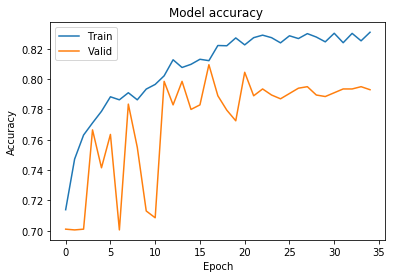

<Figure size 432x288 with 0 Axes>

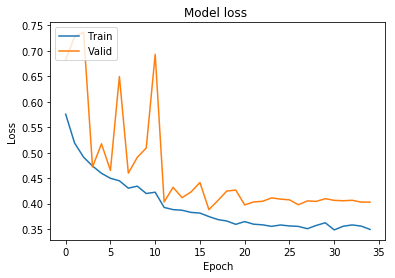

Elapsed 1884.931 seconds.


<Figure size 432x288 with 0 Axes>

In [ ]:

batch_size=32
start = time.perf_counter()

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
# The first is the allow_growth option, which attempts to allocate only as much
# GPU memory based on runtime allocations: it starts out allocating very little 
# memory, and as Sessions get run and more GPU memory is needed, we extend the GPU memory region needed by 
# the TensorFlow process. Note that we do not release memory, since that can lead 
# to even worse memory fragmentation. To turn this option on, set the option in the ConfigProto by:

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

sess = tf.Session(config=config)


name_weights = "Train_model_weights_{epoch:02d}.h5"
csv_name = "trainning_k.csv"
callbacks = get_callbacks(name_weights = name_weights, patience_lr=10, name_csv = csv_name)
generator = gen.flow(x_train, y_train, batch_size = batch_size)
# change epochs
history = model.fit_generator(
                  generator,
                  steps_per_epoch=len(x_train)/batch_size,
                  epochs=35,
                  verbose=1,
                  validation_data = (x_val, y_val),
                  validation_steps = len(x_val),
                  callbacks = callbacks)
      
      
###### Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy ' )
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()
plt.savefig("AccxEpoch.png")

###### Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()
plt.savefig("LossxEpoch.png")


sess.close()

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)            

AUC: 0.889


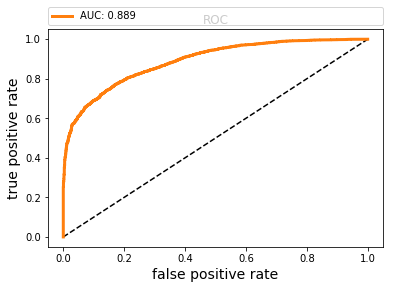

<Figure size 432x288 with 0 Axes>

In [ ]:
#print(model.evaluate(x_test, y_test)) 
      
probs = model.predict_proba(x_test)
######## keep probabilities for the positive outcome only
probsp = probs[:, 1]
######## calculate AUC
auc = roc_auc_score(y_test[:,1], probsp)
print('AUC: %.3f' % auc)

      
######## calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test[:,1], probsp)


plt.figure()
plt.plot([0, 1], [0, 1], 'k--') # k = color black
plt.plot(fpr, tpr, label="AUC: %.3f" % auc, color='C1', linewidth=3) # for color 'C'+str(j), for j[0 9]
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.title('ROC')
plt.xlabel('false positive rate', fontsize=14)
plt.ylabel('true positive rate', fontsize=14)
    
plt.show()
plt.savefig("ROCLensDetectNet.png")

In [ ]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 19.43%


In [ ]:
import matplotlib.pyplot as plt
# Predict single images
n_images = 8
# Get images from test set
test_images = x_test[:n_images]
# Predicts
# Use the model to predict the images class
preds = list(model.predict_proba(test_images))
# print("Large CNN Error: %.2f%%" % (100-scores[1]*100))
# Display
vout = (0,255)
for i in range(n_images):
    output=np.where(preds[i]==preds[i].max())
    print("Model prediction:", output[0][0])
    #print(y_test[:,1])
    print("Real:", np.uint8(y_test[i,1]))

Model prediction: 1
Real: 1
Model prediction: 0
Real: 1
Model prediction: 1
Real: 1
Model prediction: 0
Real: 0
Model prediction: 1
Real: 1
Model prediction: 0
Real: 0
Model prediction: 1
Real: 1
Model prediction: 1
Real: 0
